<a href="https://colab.research.google.com/github/sijojoy186/LearnPython/blob/main/Projects/AustoAutomobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Austo Automobiles Case Study**

## Exploratory Data Analysis for Extracting Insights



---



## **Data Overview**


The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

**Importing the libraries**




In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data**


In [12]:
df = pd.read_csv('/content/austo_automobile.csv')


**Check the structure of the data**

In [13]:
df.head()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [14]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [15]:
df.sample()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
391,38,Male,Salaried,Married,Graduate,2,Yes,No,Yes,60000,30900.0,90900,33000,Sedan


**Shape of the dataset**


In [16]:
df.shape

(1581, 14)

*The dataset has 1581 rows and 14 columns*

**Types of Data**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [18]:
# Unique values in No of Dependents
df['No_of_Dependents'].unique()

array([4, 3, 2, 1, 0])

*The 'No_of_Dependents' is a categorical column with value ranging from 0 to 4. So convert it to object type from int*

In [19]:
df['No_of_Dependents'] = df['No_of_Dependents'].astype(object)

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 173.1+ KB


*The dataset has 5 numrical and 9 categorical columns*

**Check Duplicate / Missing values**


In [20]:
df.duplicated().sum()

np.int64(0)

*There are no duplicated rows*

In [21]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *The variable `Gender` and `PartneF_salary` have 53 and 106 missing values in them*
- *There are no missing values in other variables*

**Statistical Summary**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


**Treating missing values**

In [23]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [24]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


In [25]:
# replace wrong female value with the correct value.
df['Gender'] = df['Gender'].replace('Femle', 'Female')
df['Gender'] = df['Gender'].replace('Femal', 'Female')


In [26]:
# fill nan values with mode value
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace=True)


- *The Gender value of female corrected for 2 values*
- *The Gender value of nan values replaced wtih mode value*

In [27]:
df['Gender'].value_counts()

,count
Gender,
Male,1252
Female,329


In [28]:
# 1. Impute Partner_salary with 0 where Partner_working is 'No' and Partner_salary is missing.
df.loc[(df['Partner_working'] == 'No') & (df['Partner_salary'].isnull()), 'Partner_salary'] = 0


In [29]:
# 2. Impute Partner_salary using the formula (Total_salary - Salary) where Partner_working is 'Yes' and Partner_salary is missing.
# The formula is Partner_salary = Total_salary - Salary
df.loc[(df['Partner_working'] == 'Yes') & (df['Partner_salary'].isnull()), 'Partner_salary'] = df['Total_salary'] - df['Salary']

- *Imputed 0 for partner not working*
- *Imputed Total sal - salary for Partner salary*

In [30]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *All the missing values treated*

 **Observations and Insights**

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


*   All the missing values and duplicates are
*   Data good to start with the further Analysis.
*   The buyers age is between 22 and 54.
*   The buyers dependent range from 0 to 4
*   The salary of the buyers range from 80k to 1.71 lakh
*   The price range between 18k to 70k









---



## **Univariate Analysis**

**Age**

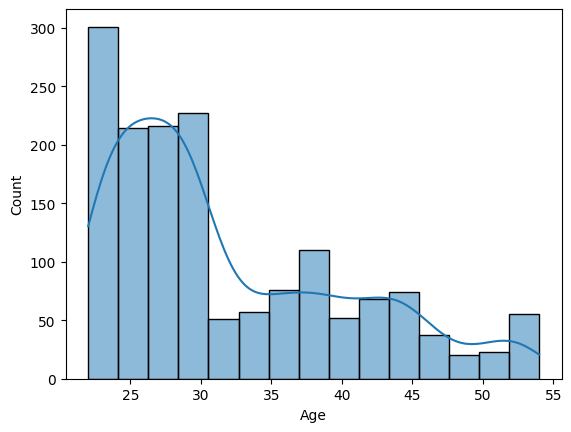

In [32]:
sns.histplot(data=df, x='Age',kde=True);


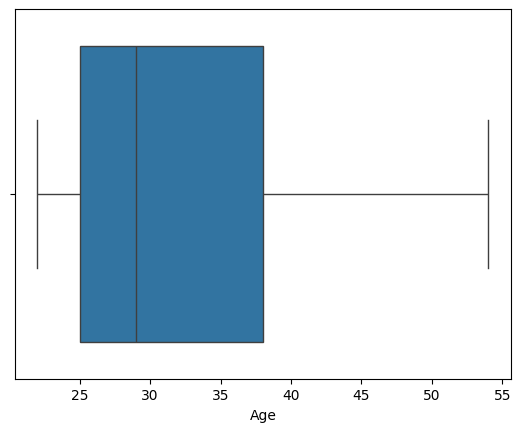

In [33]:

sns.boxplot(data=df, x='Age');

**Observations**
*   *Most of the buyers are of the range between 25 and 30*
*   *The data is right skewed*
*   *There are no outliers*
*   *Median Age is 29*


**Salary**

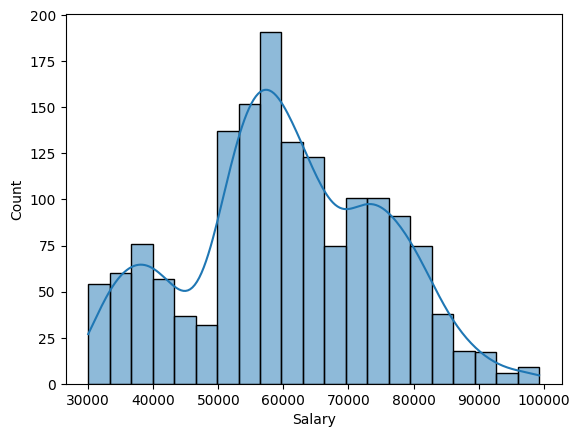

In [34]:
sns.histplot(data=df, x='Salary', kde=True);

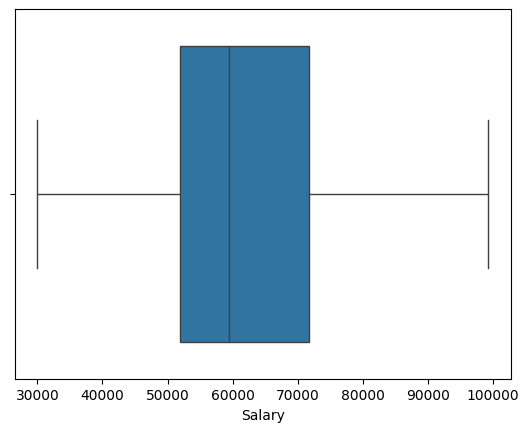

In [35]:
sns.boxplot(data=df, x='Salary');

**Observations:**
* *The distribution is not normal and few dips*
* *There are no outliers*
* *The median is ~60k

**Partner Salary**

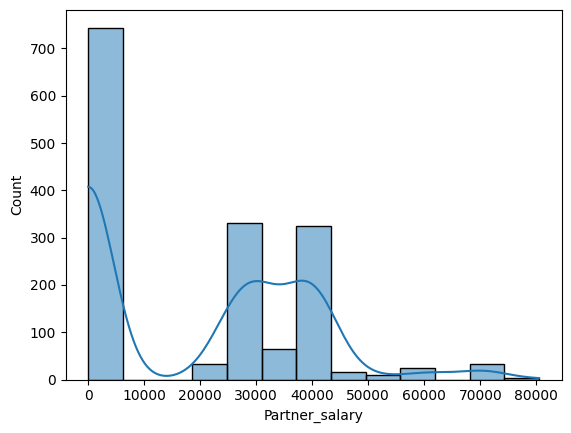

In [36]:
sns.histplot(data=df, x='Partner_salary', kde=True);

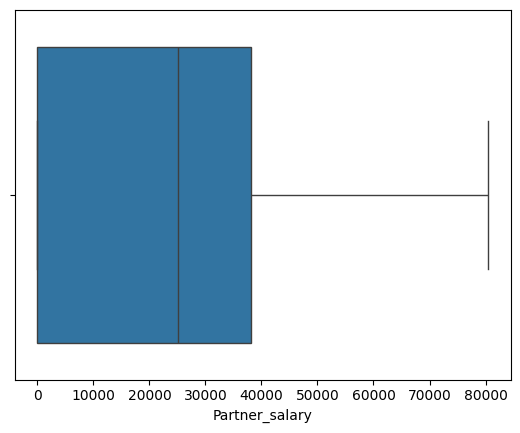

In [37]:
sns.boxplot(data=df, x='Partner_salary');

**Observations**
* *The distribution is right skewed*
* *Median Partner salary is 25k*

**Total Salary**

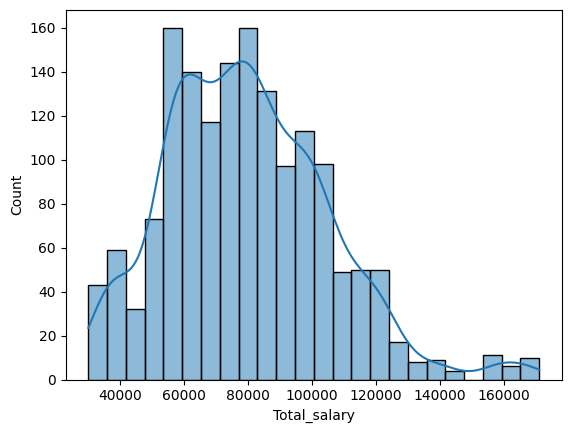

In [38]:
sns.histplot(data=df, x='Total_salary', kde=True);

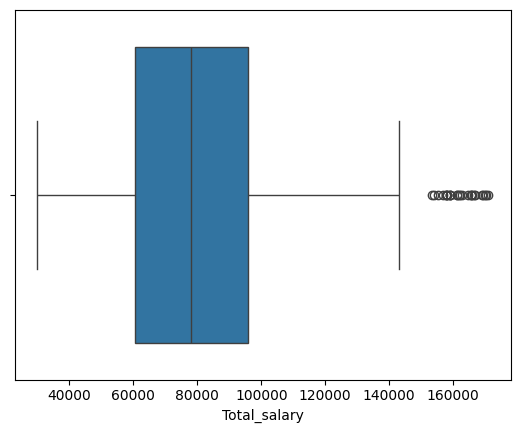

In [39]:
sns.boxplot(data=df, x='Total_salary');

**Observations**
* *Very few buyers have total salary beyond 1.2 lakh*
* *There are outliers*
* *The outliers are due to partner salary and high individual salary for few buyers.*



**Price**

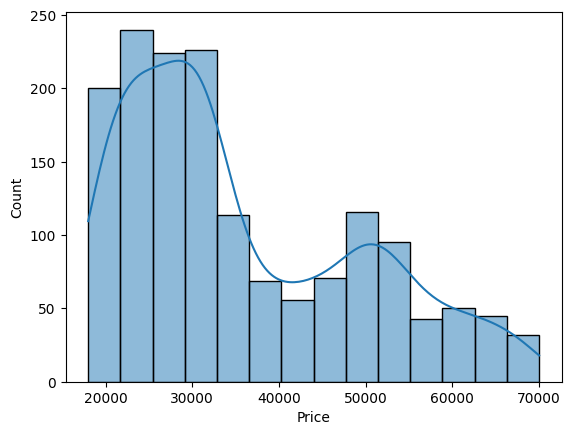

In [40]:
sns.histplot(data=df, x='Price', kde='true');

<Axes: xlabel='Price'>

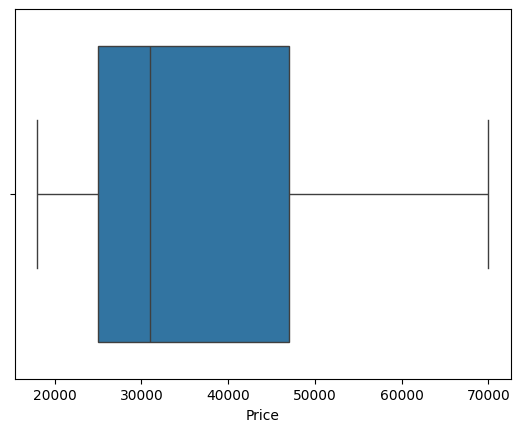

In [41]:
sns.boxplot(data=df, x='Price')

**Observations**
* *The maximum number of cars are price between 20k to 30k*
* *There is two peaks in the right skewed distribution data

**Gender**

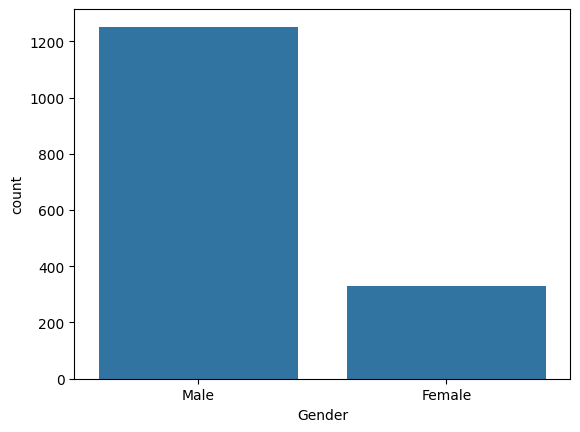

In [42]:
sns.countplot(data=df, x='Gender');

**Observations**
* *The maximum buyers are Male*

**Loan Types**

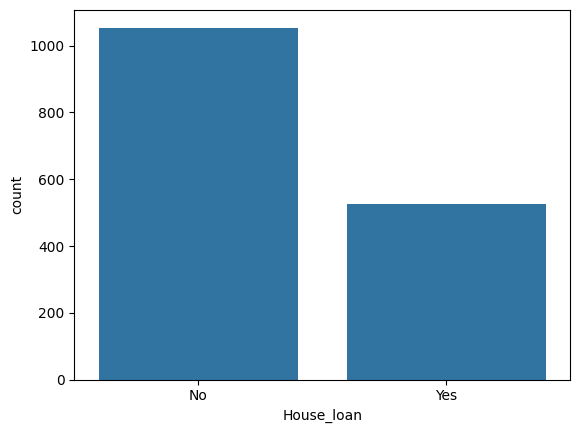

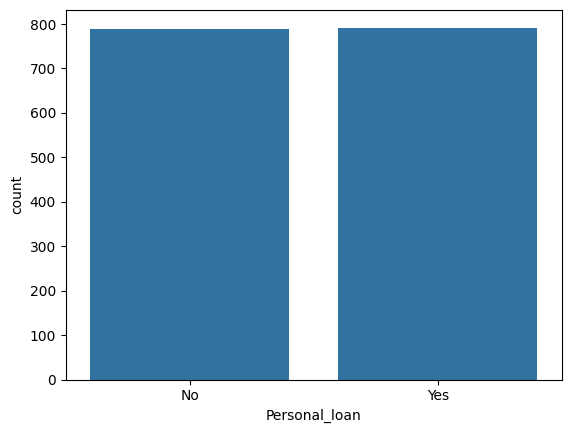

In [43]:
sns.countplot(data=df, x='House_loan')
plt.show()

sns.countplot(data=df, x='Personal_loan')
plt.show()

**Observations**
* *The buyers having a house-loan is half the buyers to those not having house loan.*
* *The buyers having personal-loan and not having are equal.*

**Make**

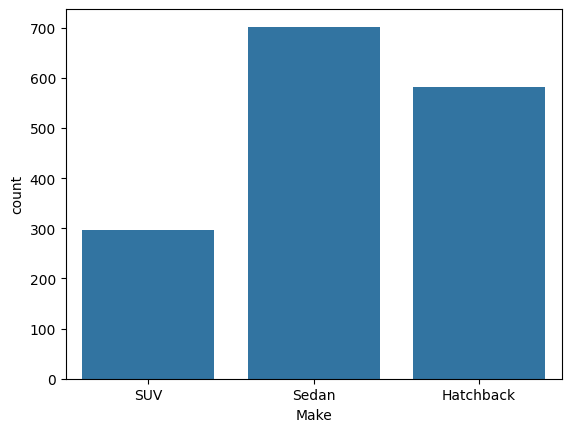

In [44]:
sns.countplot(data=df, x='Make');

*Sedan are the maximum make while SUV make is the least*

**Profession**

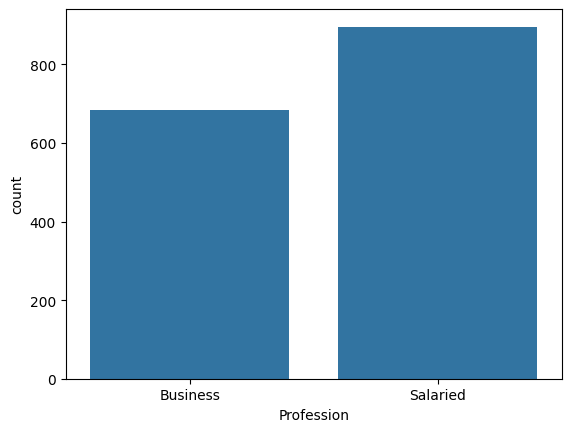

In [45]:
sns.countplot(data=df, x='Profession');

*Salaried buyers are more than business buyers*

**Working Partner**

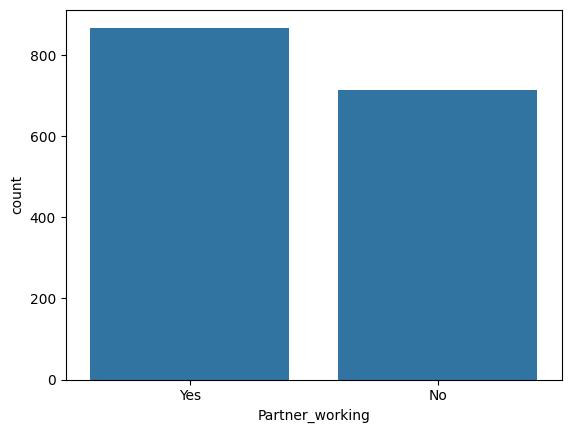

In [46]:
sns.countplot(data=df, x='Partner_working');

*Maximum buyers' partner are working*

**Dependents**

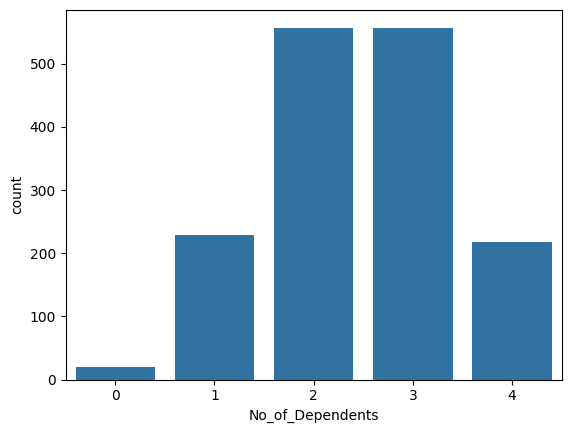

In [47]:
sns.countplot(data=df,x='No_of_Dependents');


*Most of the buyers have 2 to 3 dependents*

**Education**

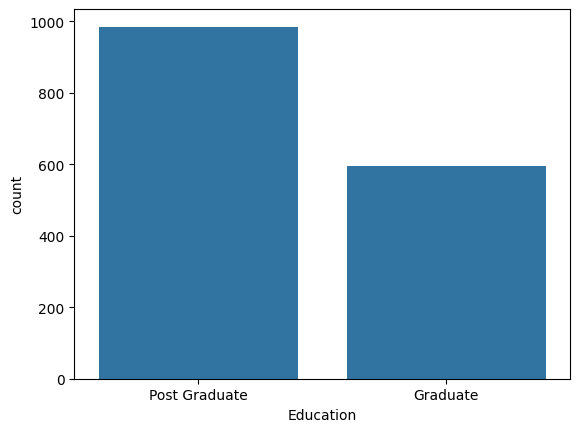

In [48]:
sns.countplot(data=df,x='Education');

*Most of the buyers are Post-Grad*

**Marital Status**

<Axes: xlabel='Marital_status', ylabel='count'>

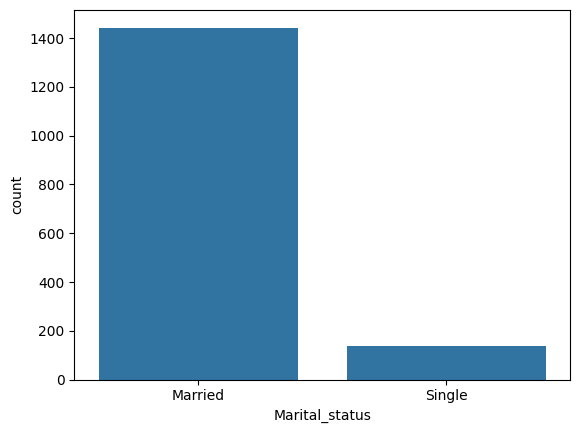

In [49]:
sns.countplot(data=df,x='Marital_status')

*Most of the buyers are Married*

## **Bivariate Analysis**

**Relationship between all numerical variables**

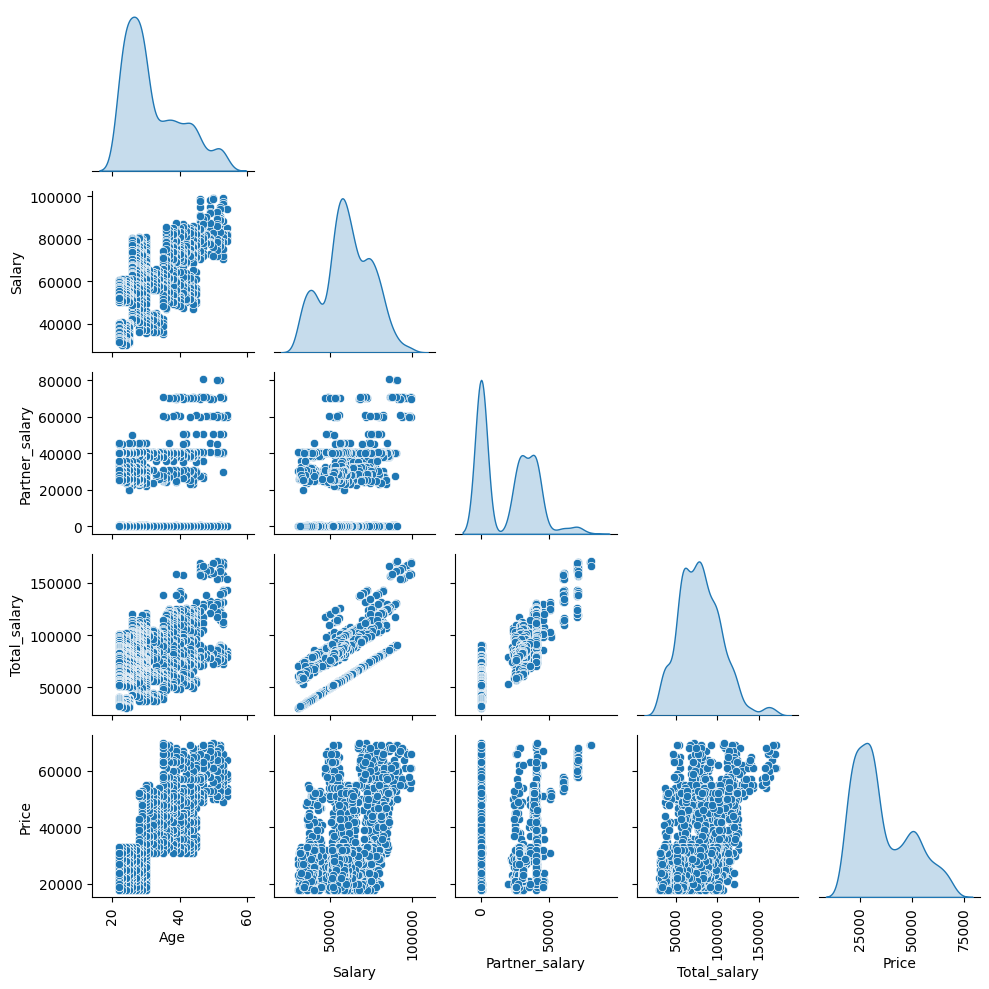

In [50]:
g = sns.pairplot(data=df.select_dtypes(include=['number']), diag_kind="kde", corner=True, height=2)

# Apply rotation to the x-axis labels only (most common requirement)
for i, ax in enumerate(g.axes[-1, :]): # Only target the bottom row of axes
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()


In [51]:
df.corr(numeric_only=True)


,Age,Salary,Partner_salary,Total_salary,Price
Age,1.000000,0.616899,0.135702,0.458869,0.797831
Salary,0.616899,1.000000,0.087155,0.641560,0.409920
Partner_salary,0.135702,0.087155,1.000000,0.820069,0.171875
Total_salary,0.458869,0.641560,0.820069,1.000000,0.367823
Price,0.797831,0.409920,0.171875,0.367823,1.000000


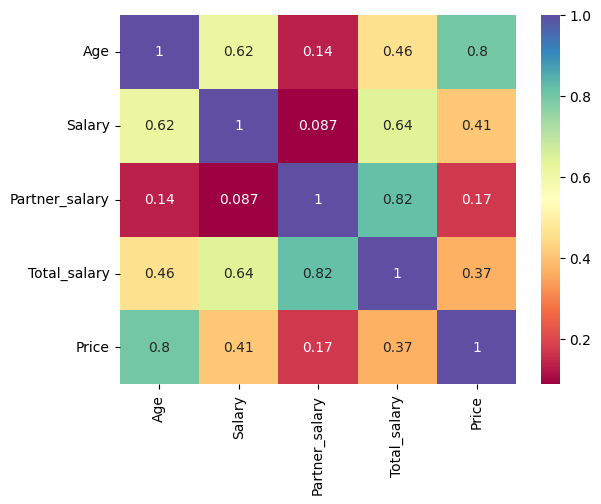

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral');

**Observations:**
* *Positive correlations between Price and Age, Age and salary, salray and Partner salary, Partner salary and Total salary.*
* *Partner's salary is contributing more to the total salary.*

**Salary of Buyers based on Gender**

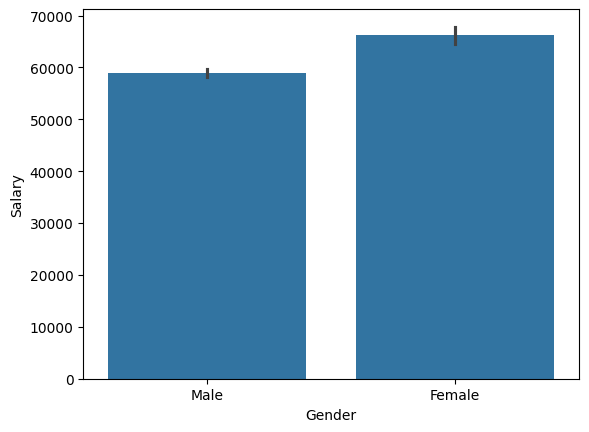

In [53]:
sns.barplot(data=df,y='Salary', x='Gender');

*Females Buyers have more salary*

**Car preferences of buyers based on Gender**

<Axes: xlabel='Gender', ylabel='count'>

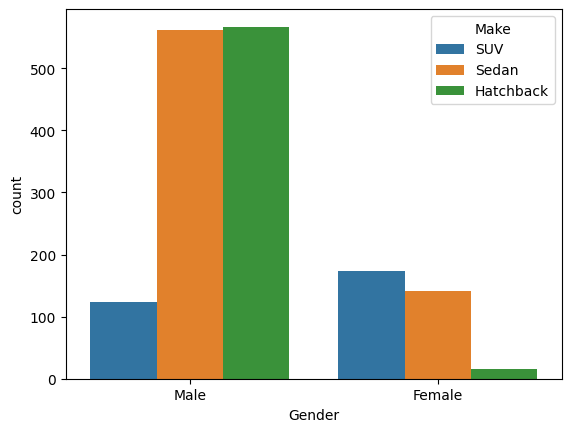

In [54]:
sns.countplot(data=df, x='Gender', hue='Make')

**Observations:**
* *Male buyers prefer Sedan and Hatchback than SUV*
* *Female buyers prefer SUV more followed by Sedan over Hatchback.*

**Car preferences of buyers with working partners**

<Axes: xlabel='Partner_working', ylabel='count'>

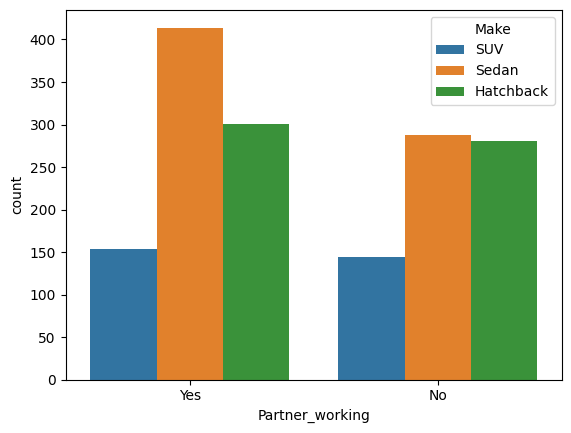

In [55]:
sns.countplot(data=df, x='Partner_working', hue='Make')

**Observations:**
* *Most of the buyers having working partner prefer Sedan over SUV & Hatchback*

**Car prefernces based on Profession**

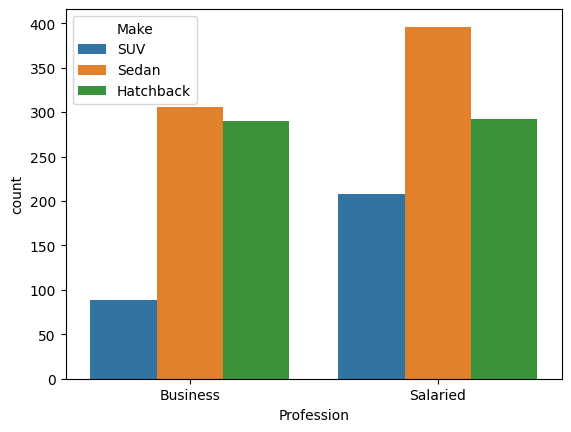

In [56]:
sns.countplot(data=df, x='Profession', hue='Make');

**Observations:**
* *Salaried professionals prefer Sedan*
* *Business professionals prefer Sedan and and Hatchback equally*


**Car purchased based on Total Salary**

<Axes: xlabel='Make', ylabel='Total_salary'>

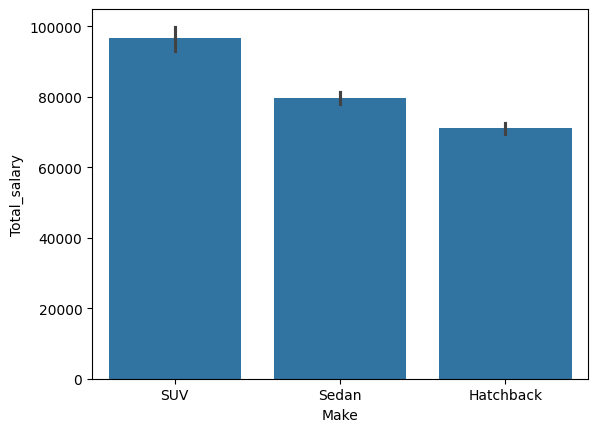

In [57]:
sns.barplot(data = df, y = 'Total_salary', x='Make')

*Buyers prefer SUVs over Sedan and Hatchback drawing having high salaries*

**Price by Car Types**

<Axes: ylabel='Price'>

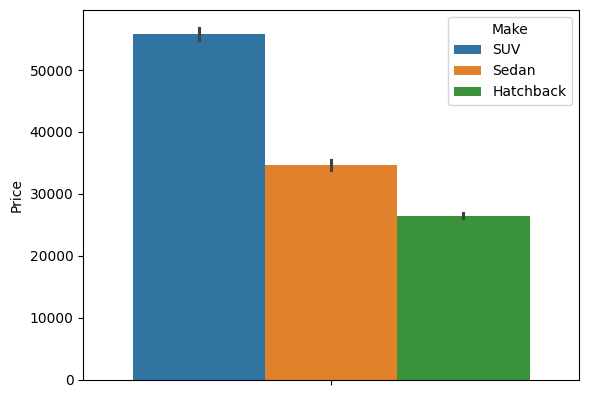

In [58]:
sns.barplot(data=df, y='Price', hue='Make')

*SUV's are priced higher than Sedan and Hatchback*




---

### **Key Questions**


**1. Do men tend to prefer SUVs more compared to women?**


Text(0, 0.5, 'SUV count')

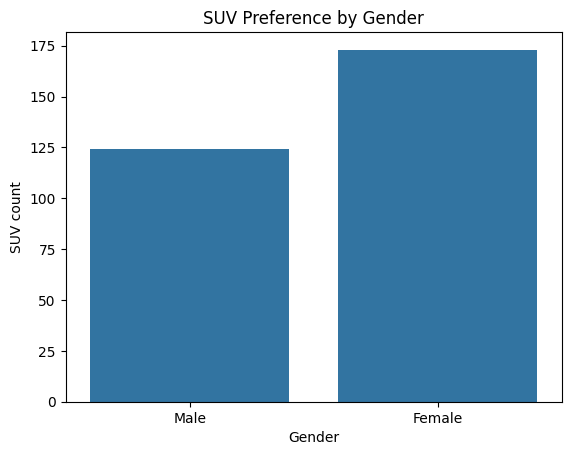

In [59]:
plt.title('SUV Preference by Gender')
df_suv = df[df['Make'] == 'SUV']
sns.countplot(data=df_suv, x='Gender')
plt.ylabel('SUV count')



**Observations:**
* *Females prefer SUVs more than Males.*


**2. What is the likelihood of a salaried person buying a Sedan?**


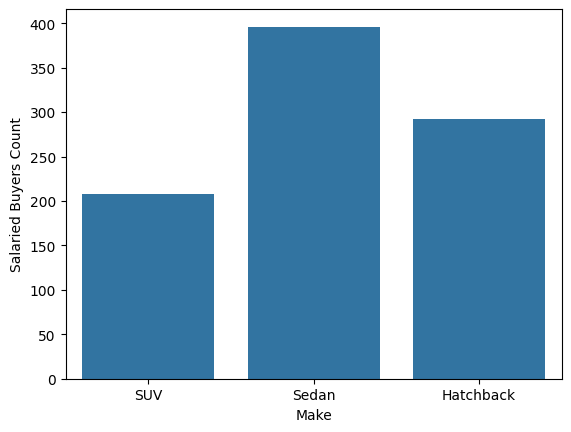

In [60]:

plt.ylabel('Salaried Buyers Count')
sns.countplot(data=df[(df['Profession'] == 'Salaried')], x='Make',legend=False);

In [61]:
# total number of Sedan salaried buyers
sedanSalCnt= df[(df['Profession']=='Salaried') & (df['Make']=='Sedan')].shape[0]
# total salaried buyers
totSalCnt = df[df['Profession']=='Salaried'].shape[0]

sedanSalPercnt = (sedanSalCnt / totSalCnt) * 100
print('Percent of salaried buyers buying a Sedan: ', sedanSalPercnt ,'%')

Percent of salaried buyers buying a Sedan:  44.19642857142857 %


**Observations:**
* *Saleried Buyers have the highest likehood to buy Sedan compared to Hatchback or SUV*
* *44.2% salaried buyers likehood to buy a Sedan.*




**3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?**


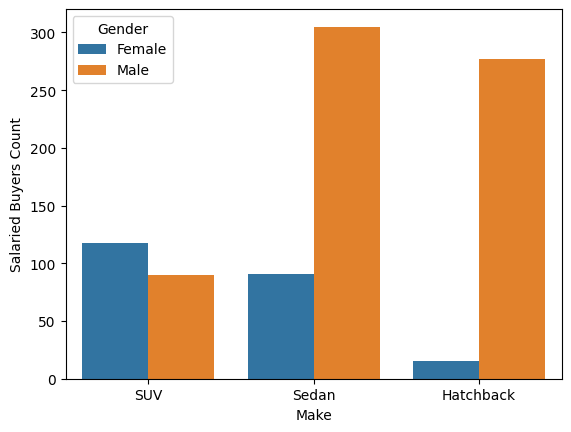

In [62]:

plt.ylabel('Salaried Buyers Count')
sns.countplot(data=df[(df['Profession'] == 'Salaried')], x='Make',hue='Gender');

**Observations:**
* *Saleried Male shows potential to buy Sedan cars rather than SUV*
* *Salaried Females shows more potential to buy SUV*


**4. How does the the amount spent on purchasing automobiles vary by gender?**


In [63]:
df.groupby('Gender')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1252.0,32416.134185,12366.253107,18000.0,23000.0,29000.0,37000.0,70000.0


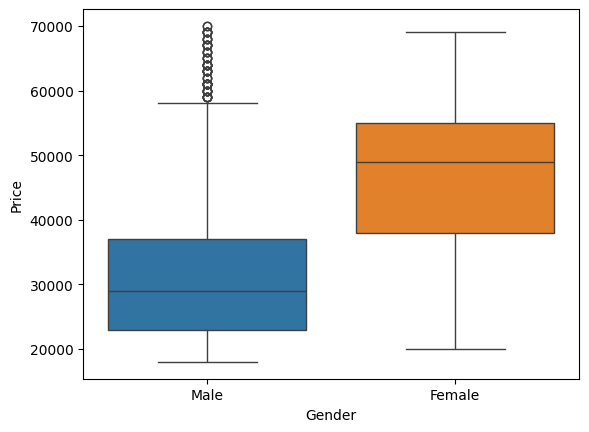

In [64]:
sns.boxplot(data=df, x="Gender", y="Price", hue="Gender");

**Observations:**
* *Female purchasing automobiles is more potential to spend more than male.*
* *About 75% of Men purchasing limit is under 37500 INR however for Female more than 75% purchase considered starting at 38000 INR and above.*
* *There are few outliers in the Male purchasing spends.*

**5. How much money was spent on purchasing automobiles by individuals who took a personal loan?**


In [65]:
df.groupby('Personal_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


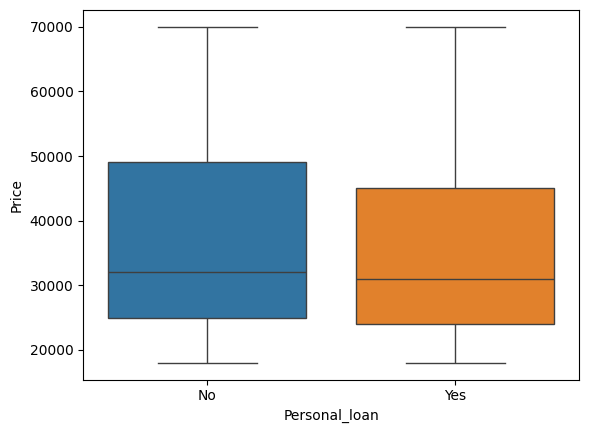

In [66]:
sns.boxplot(data=df, x="Personal_loan", y="Price", hue="Personal_loan");

**Observations:**
* *75% Buyers with personal_loan made the purchase under INR 45000*
* *The median purchase for buyers having 31000*
* *There is no significant change in buyers pattern on the purchase amount due to the Personal loan.*


**6. How does having a working partner influence the purchase of higher-priced cars?**

In [67]:
df.groupby('Partner_working')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,868.0,35267.281106,13479.532555,18000.0,24000.0,31000.0,46000.0,70000.0


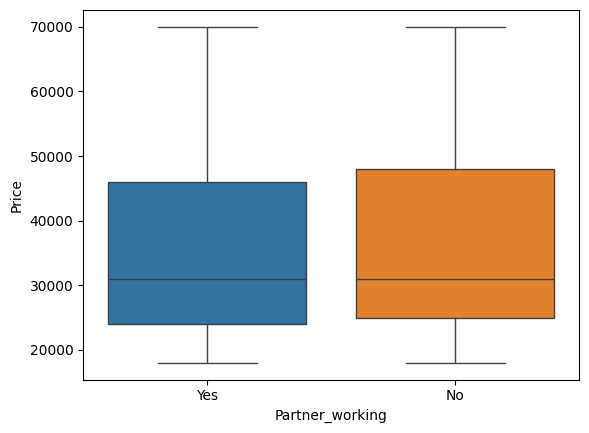

In [68]:
sns.boxplot(data=df, x="Partner_working", y="Price", hue="Partner_working");

**Observations:**
* *75% Buyers with personal_loan made the purchase under INR 45000*
* *The median purchase for buyers having 31000*
* *There is no significant change in buyers pattern on the purchase amount due to the Personal loan.*

## **Actionable Insights & Recommendations**


Please note the following insights and recommendations from the above EDA
1. The company need to target marketing and adverting efforts for SUVs more to women and consider design that appeal to their preferences.
2. Focus marketing efforts for Sedans towards salaried individuals highlighting features that benefits this group.
3. Consider targeting salaried males with promotions or incentives specifically
tailored towards Sedan.
4. High segment of SUV and Sedan options should be offered to female considering their willingness to spend more than males.
5. Offer financing or loan options tailored to the spending habits of customers,
potentially with incentives or discounts for loan applicants.
6. Continue to market higher-priced cars to buyers having partner working and nonworking highlighting the benifit & statue value provided by the high class cars.